In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file from Google Drive
df = pd.read_csv('/content/drive/My Drive/homeprices.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


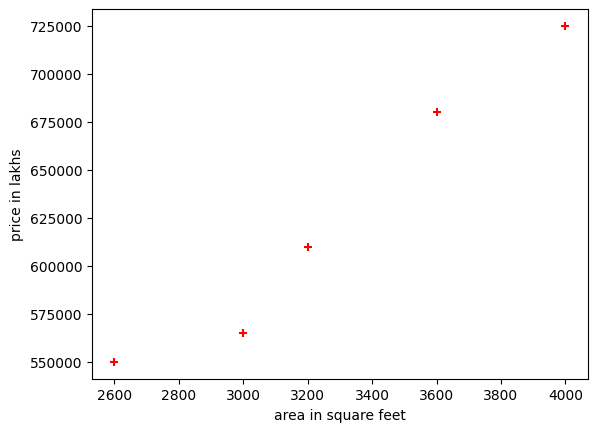

In [5]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.xlabel('area in square feet')
plt.ylabel('price in lakhs')
plt.scatter(df.area,df.price,color='red',marker='+')

In [6]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)


LinearRegression()

In [7]:
x=np.array(df[['area']])
print(x)
reg.predict(x)

[[2600]
 [3000]
 [3200]
 [3600]
 [4000]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

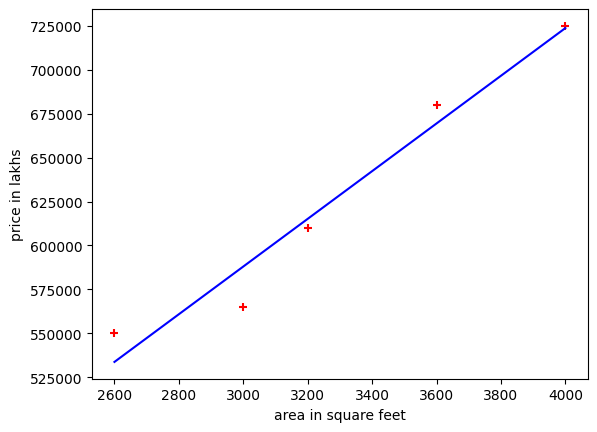

In [8]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.xlabel('area in square feet')
plt.ylabel('price in lakhs')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [9]:
y_actual=df[['price']]
y_pred=reg.predict(x)
print(y_actual)
print(y_pred)

    price
0  550000
1  565000
2  610000
3  680000
4  725000
[533664.38356164 587979.45205479 615136.98630137 669452.05479452
 723767.12328767]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
from sklearn.metrics import mean_squared_error
import math
mse=mean_squared_error(y_actual,y_pred)
print(mse)
rmse=math.sqrt(mse)
print(rmse)

186815068.4931509
13668.030893042014


In [11]:
reg.coef_

array([135.78767123])

In [12]:
reg.intercept_

180616.43835616432

In [13]:
reg.predict([[2400]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([506506.84931507])

In [14]:
0.01191685*2400+28.335100446428577

56.935540446428575

In [15]:
df1=pd.read_csv('/content/drive/My Drive/areas.csv')
df1

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [16]:
price=reg.predict(df1)

In [18]:
df1['prices']=price
df1

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [19]:
df1.to_csv('prediction.csv',index=False)

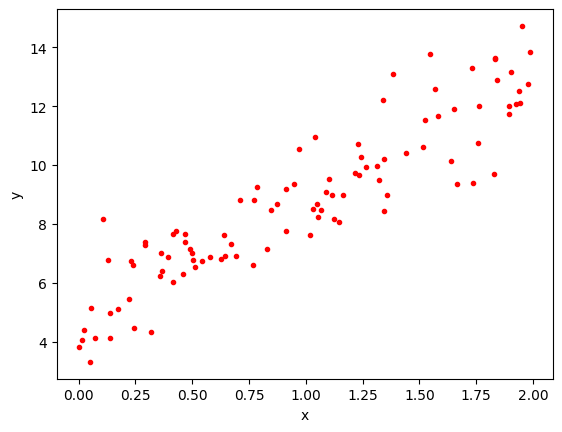

In [20]:
x=2*np.random.rand(100,1)
y=5+4*x+np.random.randn(100,1)

get_ipython().run_line_magic('matplotlib', 'inline')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x,y,color='red',marker='.')

In [21]:
from sklearn.preprocessing import add_dummy_feature
x_b=add_dummy_feature(x)
theta_best=np.linalg.inv(x_b.T@x_b)@x_b.T@y
theta_best

array([[4.82989528],
       [4.06013078]])